<a href="https://colab.research.google.com/github/samgarcia3/Auto-MPG-Analysis/blob/main/Auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto MPG DataSet

## Data Dictionary

- **mpg** - Miles Per Gallon.
- **cylinders** - Count of how many cylinders the vehicle contains.
- **displacement** - The measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.
- **horsepower** - Unit of power equal to 550 foot-pounds per second (745.7 watts)
- **weight** - Weight of the vehicle.
- **acceleration** - Capacity to gain speed within a short time.
- **model year** - The year in which the vehicle was manufacured
- **origin** - [Manufacturers Certificate of Origin](https://en.wikipedia.org/wiki/Manufacturer%27s_Certificate_of_Origin) is a specified document certifying the country of origin of the merchandise required by certain foreign countries for tariff purposes. It sometimes requires the signature of the consulate of the country to which it is destined.
- **car name** - Vehicle class/type/name given by the manufacturer.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving auto-mpg.csv to auto-mpg (1).csv


In [ ]:
import io
mpg_df = pd.read_csv(io.BytesIO(data_to_load['auto-mpg.csv']))

In [ ]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
mpg_df.shape

(398, 9)

## Data Cleaning


In [ ]:
clean_mpg = mpg_df.copy()
clean_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**Duplicates**


In [ ]:
# check for duplicate rows
duplicate_indicator = clean_mpg.duplicated()

In [ ]:
# these rows have duplicates in the data
clean_mpg.loc[duplicate_indicator, :]

In [ ]:
duplicate_indicator.sum()/duplicate_indicator.shape[0]*100

0.0

The dataset does not contain any duplicates

**Missing Values**
<br>

Next we check the table for completeness and see if any data is missing. We present the per-columns fraction of missing values below:

In [ ]:
missing_fraction = clean_mpg.isna().sum()/clean_mpg.shape[0]*100
missing_fraction

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
car name        0.0
dtype: float64

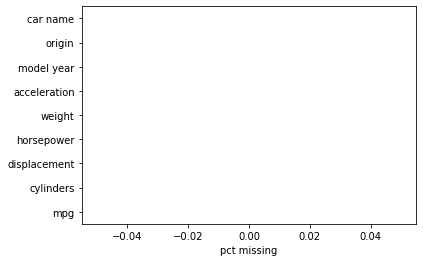

In [ ]:
# plot the misssing values
missing_fraction.plot(kind="barh")# histogram
plt.xlabel("pct missing");# label missing categories

#EDA

Let's go ahead and check what kind of data types this dataset contains.

In [ ]:
# Check the data types 
clean_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

**Statistics**

In [ ]:
# Check any interesting statistics
clean_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


ToDo:

- Convert data types
- Create New Features
- Combine Features
- Remove Features?


In [ ]:
clean_mpg['mpg'].mean()

23.514572864321615

## Value Counts for certain features
<br>

**Model Year**

In [ ]:
# Print value counts
print(clean_mpg['model year'].value_counts())

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64


**Car Name**

In [ ]:
# Print value counts
print(clean_mpg['car name'].value_counts())

ford pinto              6
toyota corolla          5
ford maverick           5
amc matador             5
chevrolet impala        4
                       ..
honda civic 1500 gl     1
audi 100 ls             1
ford fairmont futura    1
plymouth 'cuda 340      1
datsun 310              1
Name: car name, Length: 305, dtype: int64


**Origin**

In [ ]:
# Print value counts
print(clean_mpg['origin'].value_counts())

1    249
3     79
2     70
Name: origin, dtype: int64


**Cylinders**

In [ ]:
# Print value counts
print(clean_mpg['cylinders'].value_counts())

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


In [ ]:
clean_mpg_round = clean_mpg.round()
clean_mpg_round

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,12.0,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.0,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,16.0,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,25.0,82,2,vw pickup
395,32.0,4,135.0,84,2295,12.0,82,1,dodge rampage
396,28.0,4,120.0,79,2625,19.0,82,1,ford ranger


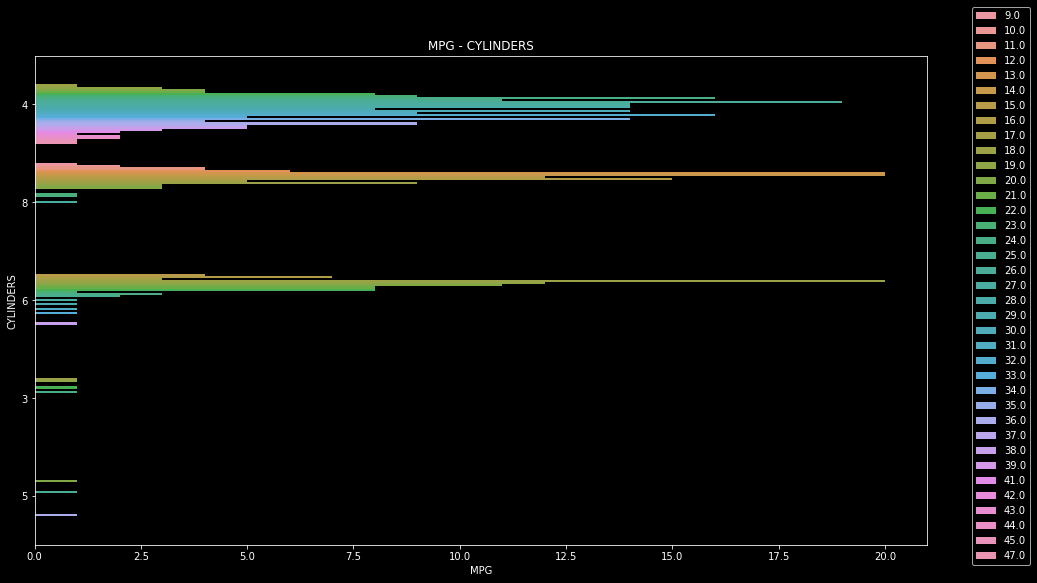

In [146]:
# set up 
plt.style.use("dark_background")
plt.figure(figsize=(16,9))
# Plot variables and color palette          
sns.countplot(y='cylinders', hue='mpg', data=clean_mpg_round, 
              order=clean_mpg_round.cylinders.value_counts().iloc[:10].index)# retrieve top 10 counts
# title        
plt.title("MPG - CYLINDERS")
plt.xlabel("MPG")
plt.ylabel("CYLINDERS")

# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1.1), loc=2,
           borderaxespad=0.)